In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pylab import rcParams
from sklearn import preprocessing

import scipy
from scipy.stats.stats import pearsonr

In [6]:
%matplotlib inline
pylab.rcParams[ 'figure.figsize' ] = 5 , 4
sns.set_style('whitegrid')

In [7]:
Transit_Reviews=pd.read_csv("landmarks_count.csv", usecols=['Hotel_Name','landmark_count','Review_Count'])
Transit_Reviews = Transit_Reviews.drop_duplicates()
Transit_Reviews.index = pd.RangeIndex(start=0, stop=len(Transit_Reviews), step=1)
Transit_Reviews.to_csv('landmarks_count.csv')
Transit=pd.read_csv("landmarks_count.csv", usecols=['Hotel_Name','landmark_count','Review_Count'])



In [8]:
Hotel_Reviews=pd.read_csv("Hotel_Reviews-2.csv",usecols=['Hotel_Name','Reviewer_Score'])
Hotel_Reviews.head()

,Hotel_Name,Reviewer_Score
0,Hotel Arena,2.9
1,Hotel Arena,7.5
2,Hotel Arena,7.1
3,Hotel Arena,3.8
4,Hotel Arena,6.7


In [9]:
Hotel_name=np.array([])
mean_reviewer_score=np.array([])

In [10]:
Hotels=Hotel_Reviews.Hotel_Name.unique()

In [11]:
for Hotel in Hotels:
    TEMP=Hotel_Reviews.loc[Hotel_Reviews['Hotel_Name']==Hotel]
    TEMP=TEMP.reset_index()
    Hotel_name=np.append(Hotel_name,Hotel)
    
    mean_reviewer_score=np.append(mean_reviewer_score, TEMP['Reviewer_Score'].mean())

In [12]:
column1=['Hotel_name','mean_reviewer_score']

In [13]:
data1=np.column_stack((Hotel_name, mean_reviewer_score))

In [14]:
HotelReviews=pd.DataFrame(data1, columns=column1)
HotelReviews['mean_reviewer_score']=pd.to_numeric(HotelReviews['mean_reviewer_score'])
HotelReviews=HotelReviews[['mean_reviewer_score']]
HotelReviews.head()

,mean_reviewer_score
0,7.836296
1,8.602827
2,9.298843
3,7.711469
4,8.848571


In [15]:
Connections=pd.concat([Transit_Reviews, HotelReviews], ignore_index=False, axis=1)
Connect = Connections[Connections.landmark_count!='-']

Connect['landmark_count']=Connect['landmark_count'].astype(str).astype(int)
Connect

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Hotel_Name,landmark_count,Review_Count,mean_reviewer_score
0,Hotel Arena,6,405.0,7.836296
1,K K Hotel George,2,566.0,8.602827
2,Apex Temple Court Hotel,4,1037.0,9.298843
3,The Park Grand London Paddington,3,1770.0,7.711469
4,Monhotel Lounge SPA,1,35.0,8.848571
5,Kube Hotel Ice Bar,6,19.0,5.852632
6,The Principal London,8,1425.0,8.029333
7,Park Plaza County Hall London,6,2223.0,8.369546
8,One Aldwych,6,136.0,9.144853
9,Splendid Etoile,1,127.0,9.142520


In [16]:
TransitGroups=Connect.landmark_count.unique()

In [17]:
TransitGroups.size

11

In [18]:
Connect['landmark_count'].value_counts().sort_values(ascending=False)

2     236
3     187
4     179
1     168
5     157
10    143
6     136
7      94
8      69
0      58
9      50
Name: landmark_count, dtype: int64

In [19]:
bins = [-1, 0, 2, 4, 6, 8,  20]
groups=Connect.groupby(['landmark_count',pd.cut(Connect.landmark_count, bins)])
Transits = groups.size().unstack().sum()
Transits

landmark_count
(-1, 0]     58.0
(0, 2]     404.0
(2, 4]     366.0
(4, 6]     293.0
(6, 8]     163.0
(8, 20]    193.0
dtype: float64

In [20]:
Con1 = Connect[Connect.landmark_count<3].mean_reviewer_score.mean()
Con1

8.365479676786508

In [21]:
Con2 = Connect[(Connect['landmark_count']>2) & (Connect['landmark_count']<5)].mean_reviewer_score.mean()
Con2

8.519857792217033

In [22]:
Con3 = Connect[(Connect['landmark_count']>4) & (Connect['landmark_count']<7)].mean_reviewer_score.mean()
Con3

8.491537231052016

In [23]:
Con4 = Connect[(Connect['landmark_count']>6) & (Connect['landmark_count']<9)].mean_reviewer_score.mean()
Con4

8.535132523955864

In [24]:
Con5 = Connect[(Connect['landmark_count']>8) & (Connect['landmark_count']<11)].mean_reviewer_score.mean()
Con5

8.52433227973343

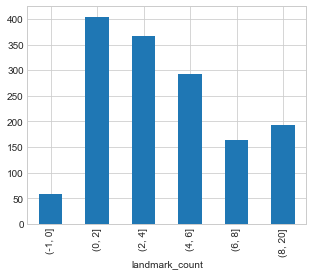

In [25]:
Transits.plot('bar')
plt.show()

Text(0,0.5,'Number of Hotels')

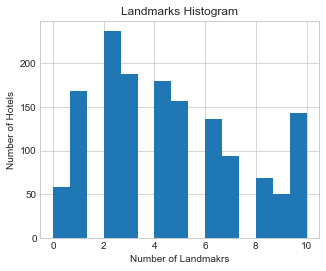

In [26]:
hist_plot = Connect['landmark_count'].hist(bins=15)
hist_plot.set_title('Landmarks Histogram')
hist_plot.set_xlabel('Number of Landmakrs')
hist_plot.set_ylabel('Number of Hotels')

In [27]:
Hotel_City_Reviews=pd.read_csv("Hotel_Info_Country_City.csv", usecols=['Hotel_Name','City'])

In [75]:
Vienna=Hotel_City_Reviews.loc[Hotel_City_Reviews['City']=='Vienna']
len(Vienna.Hotel_Name.unique())

158

In [76]:
hotels_zero_landmark=pd.DataFrame(Connect[Connect.landmark_count==0].Hotel_Name)

In [77]:
Hotel_Vienna = hotels_zero_landmark[hotels_zero_landmark['Hotel_Name'].isin(Vienna.Hotel_Name.unique())]
Hotel_Vienna

,Hotel_Name
1309,Hotel Am Stephansplatz


In [78]:
import langid
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/LiverJoker/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [79]:
Hotel_Reviews=pd.read_csv("Hotel_Reviews-2.csv")
TEMP=Hotel_Reviews.loc[Hotel_Reviews['Hotel_Name'].isin(Hotel_Vienna.Hotel_Name.unique())]
len(TEMP)

135

In [80]:
corpusP= []
corpusN= []
uniqueUsefulTokens= set()

for i in TEMP.index:
       reviewP=""
       reviewN="" 
       if ("No Negative" in TEMP['Negative_Review'][i]) and "No Positive" in TEMP['Positive_Review'][i]:
            continue
       elif "No Negative" in TEMP['Negative_Review'][i]:
            reviewP = TEMP['Positive_Review'][i]
       else:
            reviewN = TEMP['Negative_Review'][i]
       
       if (langid.classify(reviewP)[0]!='en' and langid.classify(reviewN)[0]!='en'):
            continue
       reviewP= re.sub('[^a-zA-Z]', ' ', reviewP)
       reviewN= re.sub('[^a-zA-Z]', ' ', reviewN)

       reviewP=reviewP.lower().split()
       reviewN=reviewN.lower().split()

       ps=PorterStemmer()
       reviewP  = [ps.stem(word) for word in reviewP if not word in set(stopwords.words('english'))]
       reviewN  = [ps.stem(word) for word in reviewN if not word in set(stopwords.words('english'))]
       for word in reviewP:
            uniqueUsefulTokens.add(word)
       reviewP = ' '.join(reviewP)
    
       for word in reviewN:
            uniqueUsefulTokens.add(word)
       reviewN = ' '.join(reviewN)
    
       if reviewP!="":
            corpusP.append(reviewP)
        
    
       if reviewN!="":
            corpusN.append(reviewN)
            

In [81]:
len(corpusN)

77

In [82]:
def computeTF(wordDict, bow):
    tfDict = {}
    bowCount = len(bow)
    for word, count in wordDict.items():
        tfDict[word] = count/float(bowCount)
    return tfDict

def computeIDF(docList):
    import math
    ifdDict = {}
    N = len(docList)
    
    idfDict = dict.fromkeys(docList[0].keys(),0)
    for doc in docList:
        for word, val in doc.items():
            if val>0:
                idfDict[word] +=1
            
    for word, val in idfDict.items():
        idfDict[word] = math.log(N/float(val))
        
    return idfDict

def computeTFIDF(tfBow, idfs):
    tfidf = {}
    for word, val in tfBow.items():
        tfidf[word] = val*idfs[word]
    return tfidf

In [83]:
from functools import reduce

In [84]:
bowA = []
for line in corpusN:
    line= re.sub('[^a-zA-Z]', ' ', line)
    bowA.append(line.split(" "))

bowAnew = reduce(lambda x,y: x+y,bowA)
len(bowA)

77

In [85]:
wordSet=set(bowAnew)
wordSet

{'absolut',
 'across',
 'activ',
 'actual',
 'ad',
 'adjust',
 'advers',
 'air',
 'almost',
 'also',
 'anoth',
 'apart',
 'appear',
 'ask',
 'aspect',
 'atm',
 'attempt',
 'austria',
 'away',
 'bag',
 'bar',
 'basic',
 'bathroom',
 'bed',
 'begrudgingli',
 'berri',
 'better',
 'big',
 'bircher',
 'bit',
 'bottl',
 'breakfast',
 'brunch',
 'buffet',
 'cafetiera',
 'came',
 'camera',
 'cappuccino',
 'car',
 'card',
 'center',
 'centr',
 'chang',
 'channel',
 'chip',
 'clean',
 'cleaner',
 'client',
 'close',
 'cloth',
 'coff',
 'coffe',
 'cold',
 'come',
 'comfort',
 'comment',
 'commun',
 'complaint',
 'con',
 'condit',
 'cook',
 'corner',
 'cost',
 'could',
 'creami',
 'crisp',
 'cup',
 'cut',
 'day',
 'de',
 'definit',
 'differ',
 'dine',
 'done',
 'door',
 'doubl',
 'downsid',
 'drawback',
 'dri',
 'e',
 'ear',
 'easi',
 'egg',
 'els',
 'engish',
 'english',
 'enhanc',
 'enough',
 'espresso',
 'est',
 'even',
 'everyth',
 'expect',
 'expens',
 'experi',
 'extra',
 'facil',
 'fault',


In [86]:
wordDictAarr = np.array([])
for listbowA in bowA:
    wordDictA = dict.fromkeys(wordSet,0)
    for word in listbowA:
        wordDictA[word]+=1
    wordDictAarr = np.append(wordDictAarr, wordDictA)

In [87]:
i = 0
tfBowAarr = np.array([])
for listbowA in bowA:
    tfBowA = computeTF(wordDictAarr[i], listbowA)
    i +=1
    tfBowAarr = np.append(tfBowAarr, tfBowA)
tfBowAarr

array([ {'anoth': 0.0, 'prepar': 0.0, 'uncomfort': 0.0, 'expect': 0.0, 'perhap': 0.0, 'think': 0.0, 'actual': 0.0, 'none': 0.0, 'meet': 0.0, 'stopper': 0.0, 'pick': 0.0, 'may': 0.0, 'could': 0.0, 'wear': 0.0, 'spa': 0.0, 'perfect': 0.0, 'grati': 0.0, 'big': 0.0, 'morn': 0.0, 'news': 0.0, 'hous': 0.0, 'enhanc': 0.0, 'pretti': 0.0, 'commun': 0.0, 'window': 0.0, 'done': 0.0, 'car': 0.0, 'els': 0.0, 'picki': 0.0, 'strang': 0.0, 'say': 0.0, 'basic': 0.0, 'austria': 0.0, 'also': 0.0, 'egg': 0.0, 'english': 0.0, 'bed': 0.0, 'vienna': 0.0, 'prioriti': 0.0, 'absolut': 0.0, 'de': 0.0, 'cup': 0.0, 'give': 0.0, 'vigil': 0.0, 'minim': 0.0, 'doubl': 0.0, 'buffet': 0.0, 'full': 0.0, 'natur': 0.0, 'loud': 0.0, 'noisi': 0.0, 'get': 0.0, 'miss': 0.0, 'two': 0.0, 'rice': 0.0, 'problem': 0.0, 'bit': 0.0, 'bathroom': 0.0, 'money': 0.0, 'wish': 0.0, 'member': 0.0, 'hot': 0.0, 'night': 0.0, 'lot': 0.0, 'everyth': 0.0, 'help': 0.0, 'turn': 0.0, 'orient': 0.0, 'gym': 0.0, 'slight': 0.0, 'est': 0.0, 'client': 0

In [88]:
idfs = computeIDF(wordDictAarr)
idfsData = pd.DataFrame.from_dict(idfs, orient='index', dtype=float)
idfsData[0]=1/idfsData[0]

PosRev = pd.DataFrame(idfsData[0].sort_values(ascending=False))
PositiveReviews = PosRev.iloc[0:10, :]
PositiveReviews

,0
noth,0.798236
room,0.798236
coffe,0.465857
open,0.441625
would,0.441625
hotel,0.417032
tea,0.417032
breakfast,0.417032
facil,0.391842
window,0.391842
